In [9]:
import findspark, pyspark, random

findspark.init()

sc = pyspark.SparkContext(appName="Pi")
num_samples = 1000000

def inside(p):
    x, y = random.random(), random.random()
    return x*x + y*y < 1

count = sc.parallelize(range(0, num_samples)).filter(inside).count()

pi = 4*count/num_samples
print(pi)

sc.stop()

3.142532


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
No handles with labels found to put in legend.


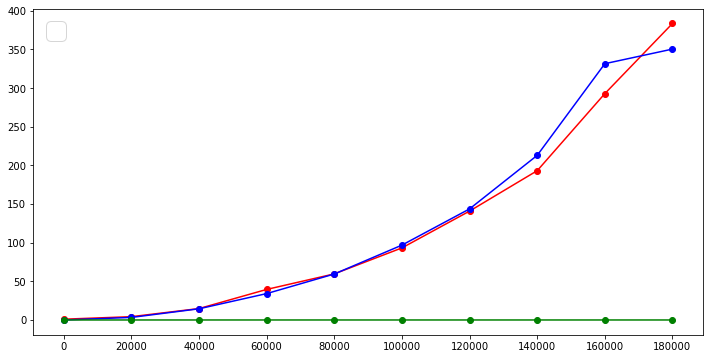

In [10]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pyspark import SparkContext

if sc is None:
    sc = SparkContext(master="local", appName="first app")
else:
    sc.stop()
    sc = SparkContext(master="local", appName="first app")
    
###performance check
spark_time_lst = []
python_time_lst = []
python_np_time_lst = []
n_lst = [20000*i for i in range(0, 10)]

for n in n_lst:
    def each_k(k):
        return 1/(16**k)*(4/(8*k+1)) - 2/(8*k+4) - 1/(8*k+5) - 1/(8*k+6)
    
    ## with spark
    start_time = time.time()
    pi_approximated = sc.parallelize(range(0,n)).map(each_k).sum()
    spark_time_lst.append(time.time()-start_time)
    
    ## pure python
    start_time = time.time()
    pi_approximated = sum((each_k(k) for k in range(0, n)))
    python_time_lst.append(time.time()-start_time)
    
    ## with numpy
    start_time = time.time()
    pi_approximated = np.apply_along_axis(arr=np.array(range(0,10)), func1d=each_k, axis=0).sum()
    python_np_time_lst.append(time.time()-start_time)

### plotting
df = pd.DataFrame({"spark":spark_time_lst.copy(), 
                   "pure python":python_time_lst.copy(),
                   "python with numpy":python_np_time_lst.copy()}, 
                  index=[20000*i for i in range(0,10)])

plt.figure(figsize=(12,6))
plt.plot(df['spark'], 'ro-')
plt.plot(df['pure python'], 'bo-')
plt.plot(df['python with numpy'], 'go-')
plt.legend(fontsize=25)
plt.xticks([20000*i for i in range(0,10)], [20000*i for i in range(0,10)])
# plt.savefig('pyspark_performance_check.svg')
plt.show()